In [202]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [203]:
#学習データ(train.csv)とテストデータ(test.csv)のデータフレームへの読み込み
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')


In [204]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [205]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [206]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


<AxesSubplot: xlabel='Survived', ylabel='count'>

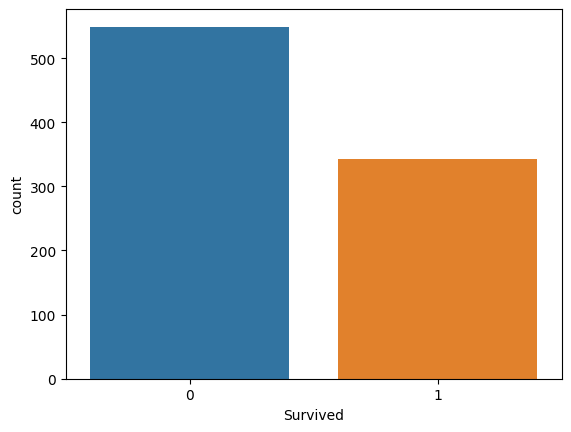

In [207]:
sns.countplot(x='Survived', data=train)



<AxesSubplot: xlabel='Pclass', ylabel='count'>

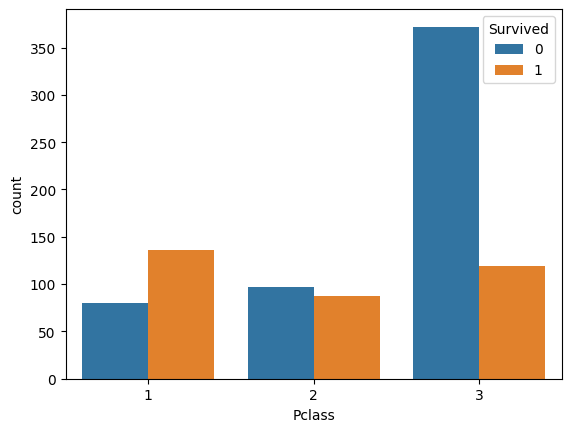

In [208]:
sns.countplot(x='Pclass', hue='Survived', data=train)


In [209]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [210]:
Title_tr = train[['Survived', 'Name']]

In [211]:
Title_tr = train[['Survived', 'Name']]

train['Title_tr'] = train['Name'].map(lambda x: x.split(', ')[1].split('. ')[0])


In [212]:
train['Title_tr'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title_tr, dtype: int64

In [213]:
train['Title_tr'] = train['Title_tr'].replace(['Dr','Rev','Mlle','Major','Col','the Countess','Capt','Ms','Sir','Lady','Mme','Don','Jonkheer'], 'Others')
train['Title_tr'].value_counts()


Mr        517
Miss      182
Mrs       125
Master     40
Others     27
Name: Title_tr, dtype: int64

In [214]:
train['Survived'].groupby(train['Title_tr']).agg(['mean', 'count'])

,mean,count
Title_tr,,
Master,0.575000,40
Miss,0.697802,182
Mr,0.156673,517
Mrs,0.792000,125
Others,0.444444,27


<AxesSubplot: xlabel='Sex', ylabel='count'>

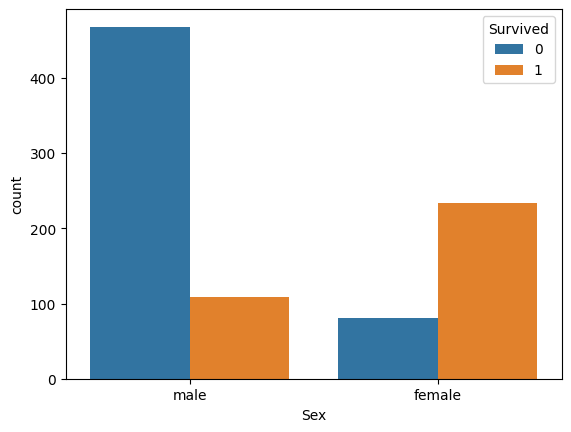

In [215]:
sns.countplot(x='Sex', hue='Survived', data=train)


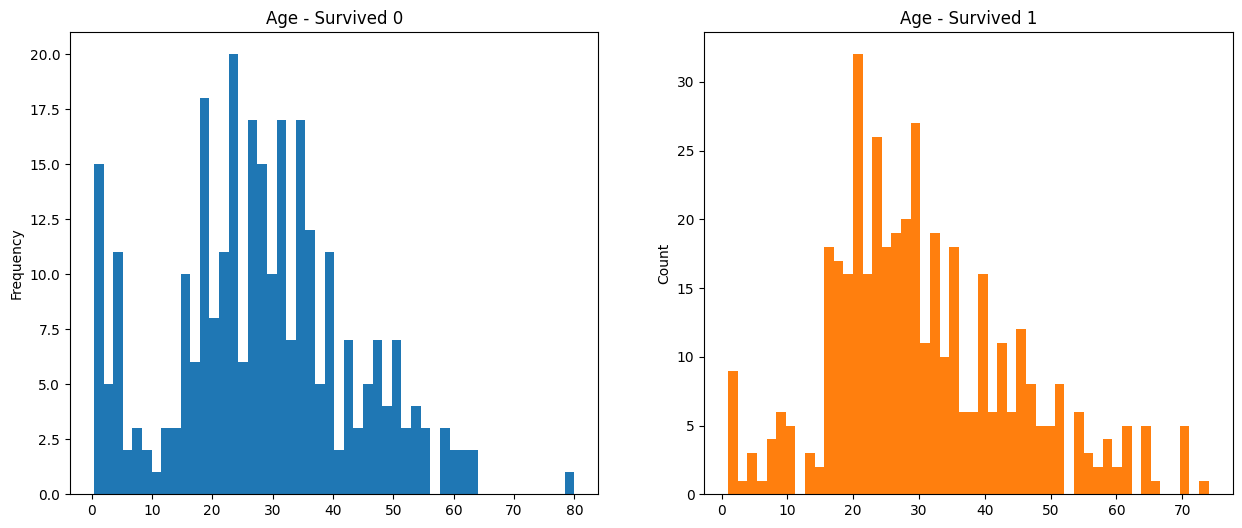

In [216]:
cmap = plt.get_cmap('tab10')

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

train[train['Survived']==0]['Age'].plot(kind='hist', bins=50, title='{} - {} 1'.format('Age', 'Survived'), color=cmap(1), ax=ax[1])

train[train['Survived']==1]['Age'].plot(kind='hist', bins=50, title='{} - {} 0'.format('Age', 'Survived'), color=cmap(0), ax=ax[0])

plt.ylabel('Count')

plt.show()

In [217]:
train.groupby('Pclass').describe()['Age']


,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,186.0,38.233441,14.802856,0.92,27.0,37.0,49.0,80.0
2,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0
3,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0


<AxesSubplot: xlabel='SibSp', ylabel='Survived'>

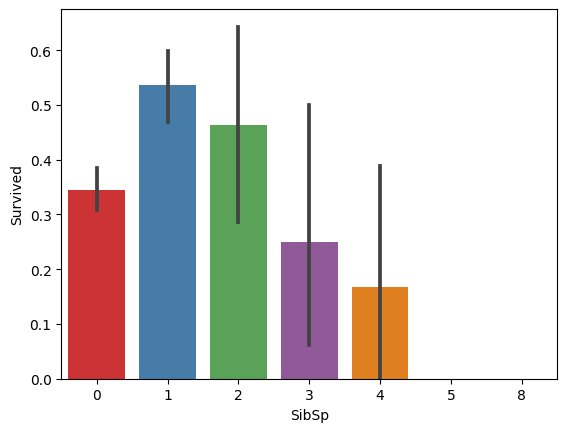

In [218]:
sns.barplot(x='SibSp', y='Survived', data=train, palette='Set1')


<AxesSubplot: xlabel='Parch', ylabel='Survived'>

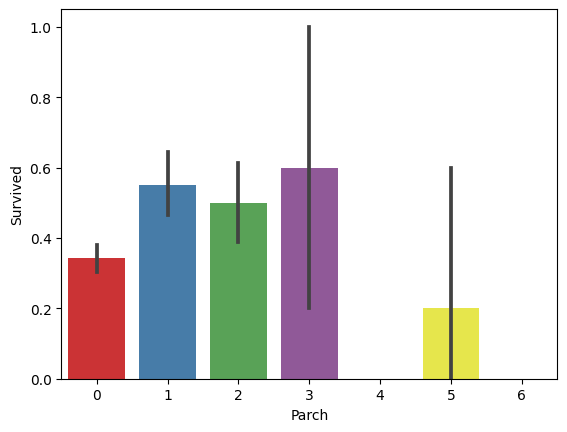

In [219]:
sns.barplot(x='Parch', y='Survived', data=train, palette='Set1')

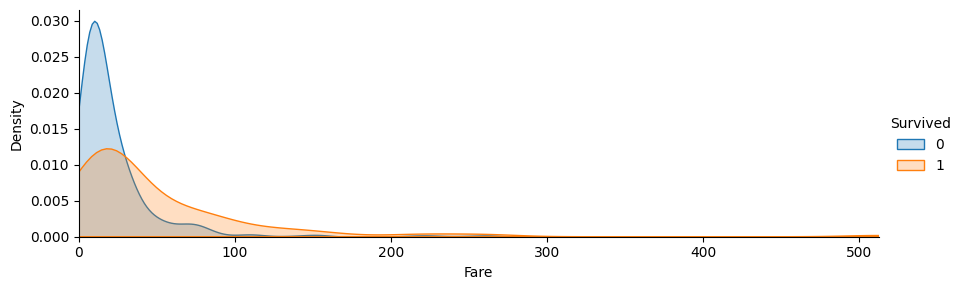

In [220]:
fare_s = sns.FacetGrid(train, hue='Survived',aspect=3)

fare_s.map(sns.kdeplot,'Fare',fill= True)

fare_s.set(xlim=(0, train['Fare'].max()))

fare_s.add_legend()



<AxesSubplot: xlabel='Embarked', ylabel='Survived'>

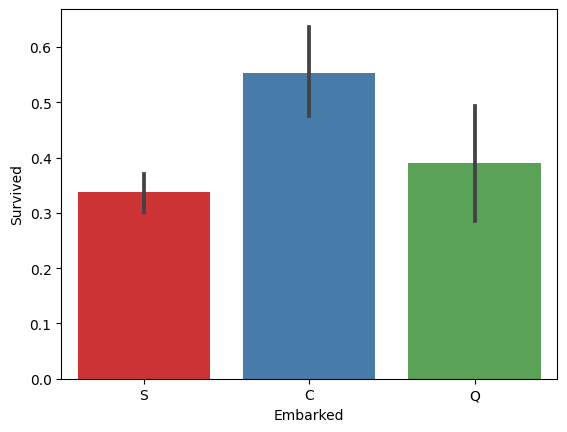

In [221]:
sns.barplot(x='Embarked', y='Survived', data=train, palette='Set1')

In [222]:
train = train.replace({'male':0, 'female':1})
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_tr
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,Mr


In [223]:
test=test.replace({'male': 0 ,'female': 1 })

test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S


In [224]:
train['Title_tr'] = train['Title_tr'].replace(['Dr','Rev','Mlle','Major','Col','the Countess','Capt','Ms','Sir','Lady','Mme','Don','Jonkheer'], 'Others')
train['Title_tr'].value_counts()


Mr        517
Miss      182
Mrs       125
Master     40
Others     27
Name: Title_tr, dtype: int64

In [225]:
train['Title_tr'] = train['Title_tr'].replace(['Dr','Rev','Mlle','Major','Col','the Countess','Capt','Ms','Sir','Lady','Mme','Don','Jonkheer'], 'Others')
train['Title_tr'].value_counts()



Mr        517
Miss      182
Mrs       125
Master     40
Others     27
Name: Title_tr, dtype: int64

In [226]:
train['Title_tr'] = train['Title_tr'].map( {'Master': 0 , 'Miss':1 , 'Mr':2, 'Mrs':3, 'Others':4})
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_tr
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,2


In [227]:
test['Title_te'].value_counts()

KeyError: 'Title_te'

In [ ]:
test['Title_te'] = test['Title_te'].replace(['Col','Rev','Ms','Dr','Dona'], 'Others')


In [ ]:
test['Title_te'].value_counts()


In [ ]:
test.head()


In [ ]:
train.loc[train['Age'].isnull(), 'Age'] = train.groupby('Pclass')['Age'].transform('median')


In [ ]:
test.loc[test['Age'].isnull(), 'Age'] = test.groupby('Pclass')['Age'].transform('median')


In [ ]:
test['Fare'] = test['Fare'].fillna(test['Fare'].median())


In [ ]:
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode())


In [ ]:
train_embarked_dum = pd.get_dummies(train['Embarked'])


In [ ]:
train_add_dum = pd.concat([train,train_embarked_dum], axis=1 )


In [ ]:
train_add_dum.head()


In [ ]:
test_embarked_dum = pd.get_dummies(test['Embarked'])

In [ ]:
test_add_dum = pd.concat([test,test_embarked_dum], axis=1 )

In [ ]:
test_add_dum.head()

In [ ]:
train.isnull().sum()

In [ ]:
test.isnull().sum()

In [ ]:
from sklearn import tree


In [ ]:
train_features = train_add_dum[['Pclass', 'Sex', 'Age', 'Fare', 'Title_tr', 'C', 'Q', 'S']].values
train_target = train['Survived'].values

In [ ]:
model = tree.DecisionTreeClassifier(max_depth = 5, class_weight = 'balanced', random_state=0)
model.fit(train_features, train_target)


In [ ]:
test_features = test_add_dum[['Pclass', 'Sex', 'Age', 'Fare','Title_te', 'C', 'Q', 'S']].values

In [ ]:
predict_test_target = model.predict(test_features)


In [ ]:
predict_test_target.shape


In [ ]:
print(predict_test_target)


In [ ]:
submission = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': predict_test_target})


In [ ]:
submission.to_csv('submission_Titanic_DecisionTreeClassifier_2.csv', index = False )
